## Visualizing the solutions of harmonic oscillator problem.   

In [3]:
# First load the numpy/scipy/matplotlib
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#load interactive widgets
import ipywidgets as widgets
from IPython.display import display

#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'

### Eigenfunctions and eigenvalues of Harmonic oscillator problem

The harmonic oscillator is often used as an approximate model for the behaviour of some quantum systems, for example the vibrations of a diatomic molecule. Potential energy is a simple quadratic function of dsiplacement: 

$$V(x)=\frac{1}{2}kx^2$$ 

- The Schrödinger equation for a particle of mass m moving in one dimension in a potential 

$$
H = -\frac{\hbar^{2}}{2m} \frac{d^{2}}{d x^{2}} + \frac{1}{2} kx^{2}.
$$

- The **eigenfunctions** are expressed in terms of Hermite polynomials $H_v(x)$, special functions well known in mathematical physics. Where $N_v$ is a normalization factor.

$$\psi(x) = N_v \cdot H_v(x) \cdot e^{-x^2/2}$$

$$H_v(x) = (-1)^v (e^{x^2})\frac{d^v}{dx^v} (e^{-x^2})$$

$$N_v = (\sqrt{\pi} 2^v v!)^{-1/2}$$

- The **eigenvalues** are a simple function of quantum number v:

$$E(v)= h\nu \Big (v+\frac{1}{2}\Big)$$


### Hermite polynomials

- Definition:

$$H_v(x) = (-1)^v (e^{x^2})\frac{d^v}{dx^v} (e^{-x^2})$$

- Recursion relation:

$$x H_v(x) = v H_{v-1}+\frac{1}{2} H_{v+1}(x)$$

| Table of first eight of Hermite polynomials $H_v(x)$ |
| :--------------------------------------------------: |
|                       $H_0=1$                        |
|                       $H_1=2x$                       |
|                     $H_2=4x^2-2$                     |
|                    $H_3=8x^3-12$                     |
|                 $H_4=16x^4-48x^2+12$                 |
|               $H_5=32x^5-160x^3+120 x$               |
|            $H_6=64x^6-480x^4+720 x^2-120$            |
|         $H_7=128x^7-1344 x^5+3360 x^3-1680x$         |

### Plotting hermite polynomials using scipy and numpy and matplotlib

The scipy.special has large collection of special functions inclduing hermite polynomials! While polynomials listed in the table are simple enough to hand type we are going to be lazy and use **scipy.special.hermite** wich provides us with polynomials of any degree to use in numerical calculations!

In [4]:
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
from math import factorial

#Check to see if they match the table
H=hermite(4)
print(H)

    4      2
16 x - 48 x - 8.882e-16 x + 12


Now let us plot hermite polynomials $H_v(x)$ on some range of values x, 

Text(0, 0.5, '$H_n(x)$')

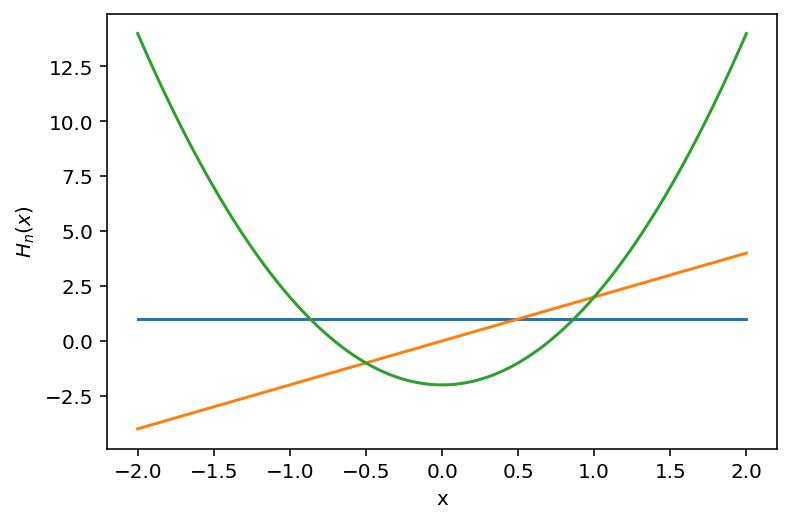

In [6]:
x=np.linspace(-2,2,1000) # Range needs to be specified for plotting functions of x

for v in range(0,3):
    
    H=hermite(v)
    
    f=H(x)
    
    plt.plot(x,f)

plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')

### Harmonic Oscillator wave functions

Now we can write down harmonic oscillator wave functions which are product of Hermite polynomials with a gaussian function and normalization factor:

$$\psi_v(x) = N_v H_v(x) e^{-x^2/2} $$

In [7]:
def N(v):
    '''Normalization constant '''
    
    return 1./np.sqrt(np.sqrt(np.pi)*2**v*factorial(v))

def psi(v, x):
    """Harmonic oscillator wavefunction for level v computed on grid of points x"""
    
    Hr=hermite(v)
    
    Psix = N(v)*Hr(x)*np.exp(-0.5*x**2)
    
    return Psix

In [27]:
# Check orthogonality

psi(1,x) @ psi(4,x)

-4.440892098500626e-16

In [8]:
# Normalization is computed by using numerical integration with trapezoidal method:
from scipy.integrate import trapz

# remember that x runs form -inf to +inf so lets use large xmin and xmax
x=np.linspace(-10,10,1000)

psi2=psi(5,x)**2

Integral = trapz(psi2,x)

print(Integral)

1.0000000000000009


### Visualize eigenfunctions of harmonic oscillator $\psi_v(x)$

In [9]:
@widgets.interact(v=(0,50))

def plot_psi(v=0):
    
    x=np.linspace(-10,10,1000)
    
    y= psi(v,x)**2
    
    plt.plot(x,y,lw=2)
    
    plt.grid('on')  
    plt.xlabel('x',fontsize=16)
    plt.ylabel('$\psi_n(x)$',fontsize=16)

interactive(children=(IntSlider(value=0, description='v', max=50), Output()), _dom_classes=('widget-interact',…

### Plot Eigenvalues and eigenfunctions of harmonic oscillator

In [10]:
def E(v):
    '''Eigenvalues in units of h'''
    
    return (v + 0.5)

def V(x):
    """Potential energy function"""
    
    return 0.5*x**2

First we decide on how many levels to plot and what is the range for x. 

In [11]:
# plot up to level vmax
VMAX=8 

# Range of x determine by classical tunring points:
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)

Next we plot classical potential and then plot eigenfunctions padded up by eigenvalues to have textbook like picture

Text(0, 0.5, '$\\psi^2_n(x)$')

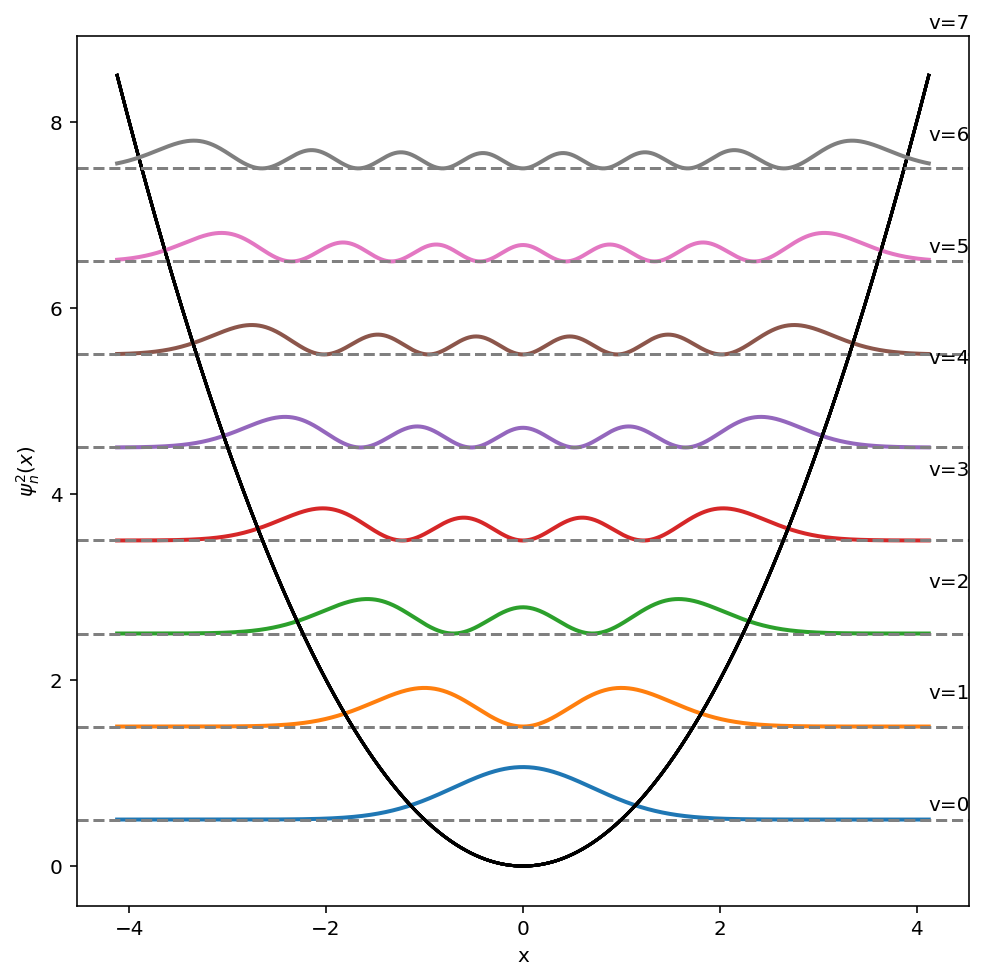

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
     
    # plot potential V(x)
    ax.plot(x,V(x),color='black')
    
    # plot psi squared which we shift up by values of energy
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)
    
    # add lines and labels
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')